In [2]:
from datasets import load_dataset
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import torch
import re
import spacy
sns.set_theme()

In [3]:
ds = load_dataset("Sp1786/multiclass-sentiment-analysis-dataset")
ds

DatasetDict({
    train: Dataset({
        features: ['id', 'text', 'label', 'sentiment'],
        num_rows: 31232
    })
    validation: Dataset({
        features: ['id', 'text', 'label', 'sentiment'],
        num_rows: 5205
    })
    test: Dataset({
        features: ['id', 'text', 'label', 'sentiment'],
        num_rows: 5206
    })
})

## Inspect the data

In [4]:
ds['train'].to_pandas().head()

,id,text,label,sentiment
0,9536,"Cooking microwave pizzas, yummy",2,positive
1,6135,Any plans of allowing sub tasks to show up in ...,1,neutral
2,17697,"I love the humor, I just reworded it. Like sa...",2,positive
3,14182,naw idk what ur talkin about,1,neutral
4,17840,That sucks to hear. I hate days like that,0,negative


In [5]:
ds['validation'].to_pandas().head()

,id,text,label,sentiment
0,317,Laying in bed til workkk... Oh the life. Defin...,0,negative
1,24292,ooohhh imma need you to get on that asap love...,2,positive
2,3513,"Thanks! I love it they have a video, so you d...",2,positive
3,4322,I left my ipod in the car so now its all warm.,2,positive
4,6203,Great app. Only complaint is that I'd like the...,2,positive


In [6]:
ds['test'].to_pandas().head()

,id,text,label,sentiment
0,9235,getting cds ready for tour,1,neutral
1,16790,"MC, happy mother`s day to your mom ;).. love yah",2,positive
2,24840,A year from now is graduation....i am pretty s...,0,negative
3,20744,because you had chips and sale w/o me,1,neutral
4,6414,Great for organising my work life balance,2,positive


## Visualise the distribution of labels for each dataset

In [7]:
train_ds = ds['train'].to_pandas().dropna()
test_ds = ds['test'].to_pandas().dropna()
val_ds = ds['validation'].to_pandas().dropna()

In [8]:
train_ds['label'].value_counts()

label
1    11649
2    10478
0     9105
Name: count, dtype: int64

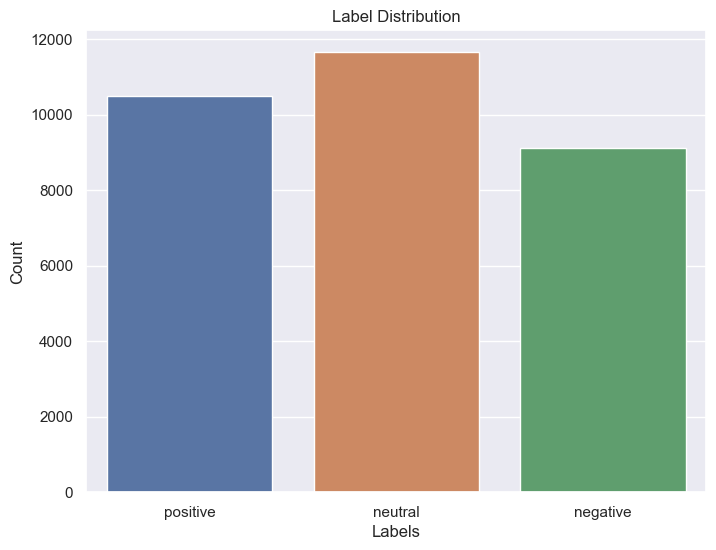

In [9]:
plt.figure(figsize=(8,6))
sns.countplot(x='sentiment', data=train_ds, hue='sentiment', legend=False)
plt.title("Label Distribution")
plt.xlabel('Labels')
plt.ylabel('Count')
plt.show()

In [10]:
test_ds['label'].value_counts()


label
1    1929
2    1730
0    1546
Name: count, dtype: int64

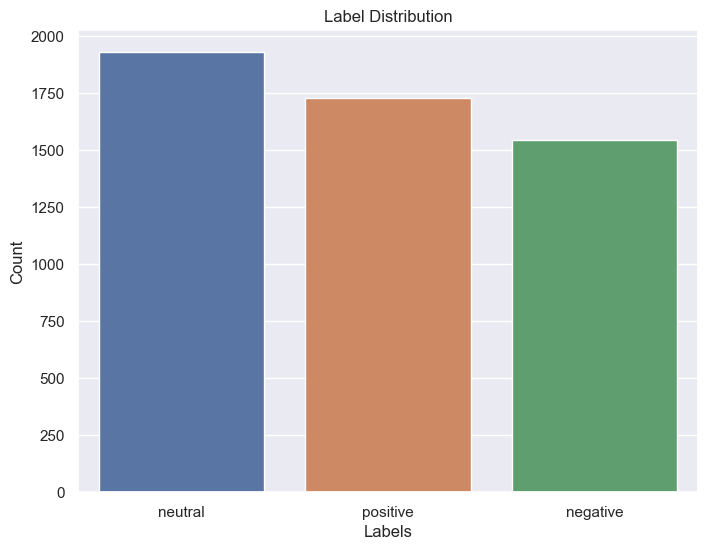

In [11]:
plt.figure(figsize=(8,6))
sns.countplot(x='sentiment', data=test_ds, hue='sentiment', legend=False)
plt.title("Label Distribution")
plt.xlabel('Labels')
plt.ylabel('Count')
plt.show()

In [12]:
val_ds['label'].value_counts()

label
1    1928
2    1760
0    1517
Name: count, dtype: int64

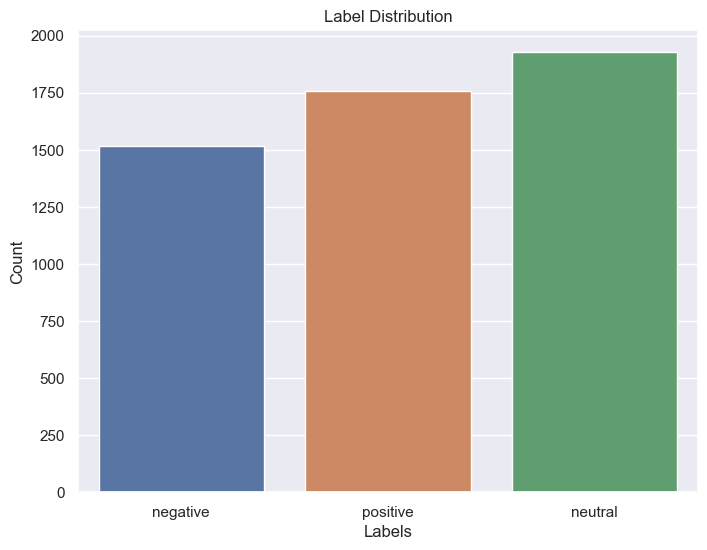

In [13]:
plt.figure(figsize=(8,6))
sns.countplot(x='sentiment', data=val_ds, hue='sentiment', legend=False)
plt.title("Label Distribution")
plt.xlabel('Labels')
plt.ylabel('Count')
plt.show()

For each of the datasets, the distribution of the labels seem to be relatively balanced / close to balanced. Where the occuerences are ranked by neutral, positive, then negative for each dataset.

## Change the labels to range from -1 to 1
where:
- -1 = negative sentiment
-  0 = neutral sentiment
-  1 = positive sentiment

In [14]:
train_ds['label'].unique()

array([2, 1, 0])

In [15]:
train_ds['label'] = train_ds['label'] - 1
test_ds['label'] = test_ds['label'] - 1
val_ds['label'] = val_ds['label'] - 1

In [16]:
train_ds['label'].unique()

array([ 1,  0, -1])

In [17]:
train_ds.head()

,id,text,label,sentiment
0,9536,"Cooking microwave pizzas, yummy",1,positive
1,6135,Any plans of allowing sub tasks to show up in ...,0,neutral
2,17697,"I love the humor, I just reworded it. Like sa...",1,positive
3,14182,naw idk what ur talkin about,0,neutral
4,17840,That sucks to hear. I hate days like that,-1,negative


## Preprocess the text data

In [18]:
nlp = spacy.load('en_core_web_sm')
spacy_stopwords = nlp.Defaults.stop_words


In [19]:
def preprocess_text_data(text, stop_words):
    url_pattern = re.compile(r'https?://\S+')
    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)
    # Remove digits / numbers
    text = re.sub(r'\d+', '', text)
    # Remove urls
    text = re.sub(url_pattern, '', text)
    text = str(text).lower()
    text = [word for word in text.split() if word not in stop_words]
    return ' '.join(text)


## Visualise distribution of words per review

In [20]:
train_ds.head(10)

,id,text,label,sentiment
0,9536,"Cooking microwave pizzas, yummy",1,positive
1,6135,Any plans of allowing sub tasks to show up in ...,0,neutral
2,17697,"I love the humor, I just reworded it. Like sa...",1,positive
3,14182,naw idk what ur talkin about,0,neutral
4,17840,That sucks to hear. I hate days like that,-1,negative
5,3655,Umm yeah. That`s probably a pretty good note ...,1,positive
6,719,whatever do you mean?,0,neutral
7,22823,That would panic me a little! Maybe you can ...,-1,negative
8,4869,Is sad when people`s phones are dead,-1,negative
9,793,sad face.,-1,negative


In [21]:
train_ds['text'] = train_ds['text'].apply(lambda text: preprocess_text_data(text, spacy_stopwords))
val_ds['text'] = val_ds['text'].apply(lambda text: preprocess_text_data(text, spacy_stopwords))
test_ds['text'] = test_ds['text'].apply(lambda text: preprocess_text_data(text, spacy_stopwords))

In [22]:
train_ds.head(10)

,id,text,label,sentiment
0,9536,cooking microwave pizzas yummy,1,positive
1,6135,plans allowing sub tasks widget,0,neutral
2,17697,love humor reworded like saying group therapy ...,1,positive
3,14182,naw idk ur talkin,0,neutral
4,17840,sucks hear hate days like,-1,negative
5,3655,umm yeah thats probably pretty good note self ...,1,positive
6,719,mean,0,neutral
7,22823,panic little maybe read orbitron gym like dowh...,-1,negative
8,4869,sad peoples phones dead,-1,negative
9,793,sad face,-1,negative


In [23]:
train_ds['word_count'] = train_ds['text'].apply(lambda x: len(x.split()))
val_ds['word_count'] = val_ds['text'].apply(lambda x: len(x.split()))
test_ds['word_count'] = test_ds['text'].apply(lambda x: len(x.split()))


In [24]:
train_ds.head()

,id,text,label,sentiment,word_count
0,9536,cooking microwave pizzas yummy,1,positive,4
1,6135,plans allowing sub tasks widget,0,neutral,5
2,17697,love humor reworded like saying group therapy ...,1,positive,13
3,14182,naw idk ur talkin,0,neutral,4
4,17840,sucks hear hate days like,-1,negative,5


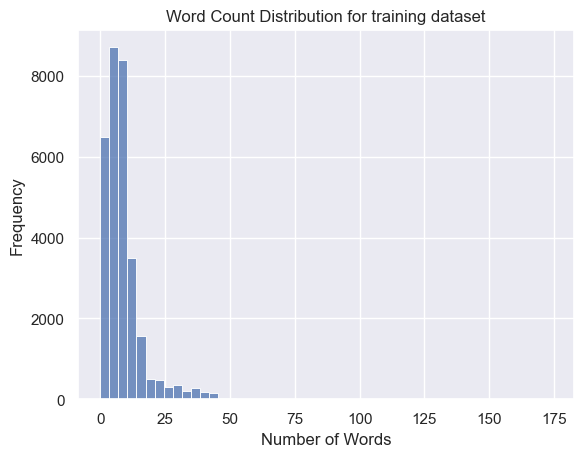

In [25]:
sns.histplot(train_ds['word_count'], bins=50)
plt.title('Word Count Distribution for training dataset')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()

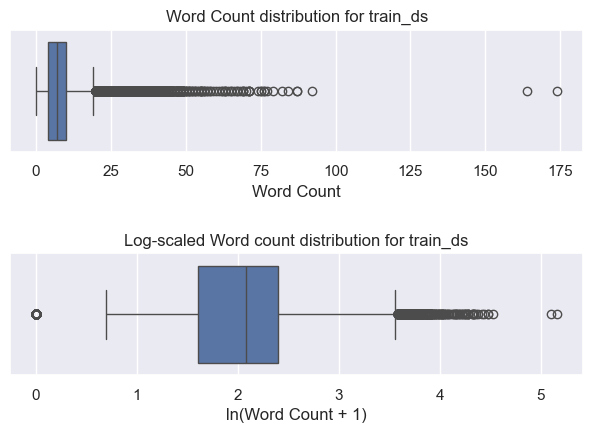

In [26]:
fig, ax = plt.subplots(2,1)

sns.boxplot(x=train_ds['word_count'], ax=ax[0])
ax[0].set_title('Word Count distribution for train_ds')
ax[0].set_xlabel('Word Count')

sns.boxplot(x=np.log1p(train_ds['word_count']), ax=ax[1])
ax[1].set_xlabel('ln(Word Count + 1)')
ax[1].set_title('Log-scaled Word count distribution for train_ds')
plt.tight_layout(pad=2.0)
plt.show()

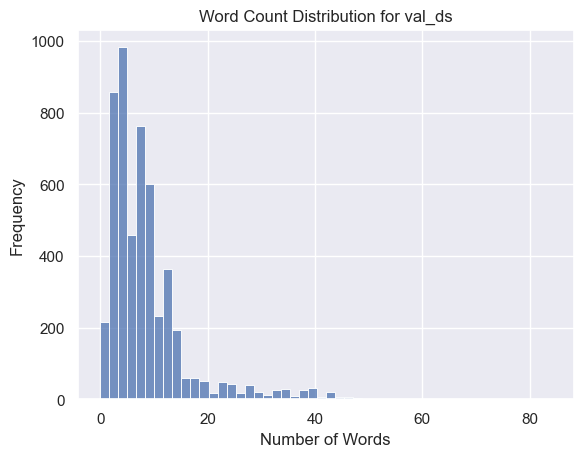

In [27]:
sns.histplot(val_ds['word_count'], bins=50)
plt.title('Word Count Distribution for val_ds')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()

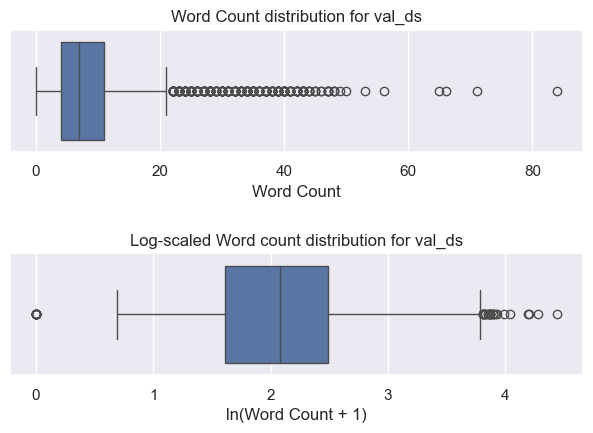

In [28]:
fig, ax = plt.subplots(2,1)

sns.boxplot(x=val_ds['word_count'], ax=ax[0])
ax[0].set_title('Word Count distribution for val_ds')
ax[0].set_xlabel('Word Count')

sns.boxplot(x=np.log1p(val_ds['word_count']), ax=ax[1])
ax[1].set_xlabel('ln(Word Count + 1)')
ax[1].set_title('Log-scaled Word count distribution for val_ds')
plt.tight_layout(pad=2.0)
plt.show()

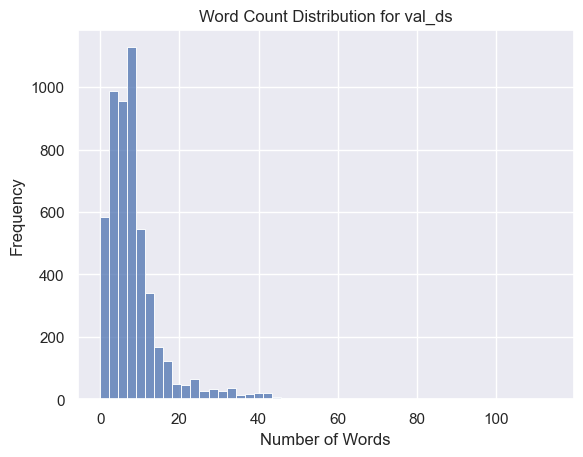

In [29]:
sns.histplot(test_ds['word_count'], bins=50)
plt.title('Word Count Distribution for val_ds')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()

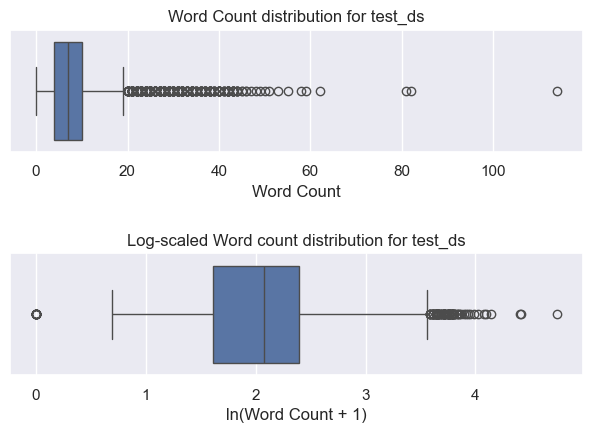

In [30]:
fig, ax = plt.subplots(2,1)

sns.boxplot(x=test_ds['word_count'], ax=ax[0])
ax[0].set_title('Word Count distribution for test_ds')
ax[0].set_xlabel('Word Count')

sns.boxplot(x=np.log1p(test_ds['word_count']), ax=ax[1])
ax[1].set_xlabel('ln(Word Count + 1)')
ax[1].set_title('Log-scaled Word count distribution for test_ds')
plt.tight_layout(pad=2.0)
plt.show()

## Visualise Unigrams and N-grams after removing stop words

In [31]:
from sklearn.feature_extraction.text import CountVectorizer

def get_top_ngrams(df, text_column='clean_text', ngram_range=(1,1), top_n=20):
    vectorizer = CountVectorizer(stop_words='english', ngram_range=ngram_range)
    X = vectorizer.fit_transform(df[text_column])
    counts = X.sum(axis=0).A1
    ngrams = vectorizer.get_feature_names_out()
    
    freq_df = pd.DataFrame({'ngram': ngrams, 'count': counts})
    return freq_df.sort_values(by='count', ascending=False).head(top_n)


In [32]:
top_n = 10
word_count_train = get_top_ngrams(train_ds, text_column='text', top_n = top_n)
word_count_test = get_top_ngrams(test_ds, text_column='text', top_n = top_n)
word_count_val = get_top_ngrams(val_ds, text_column='text', top_n = top_n)

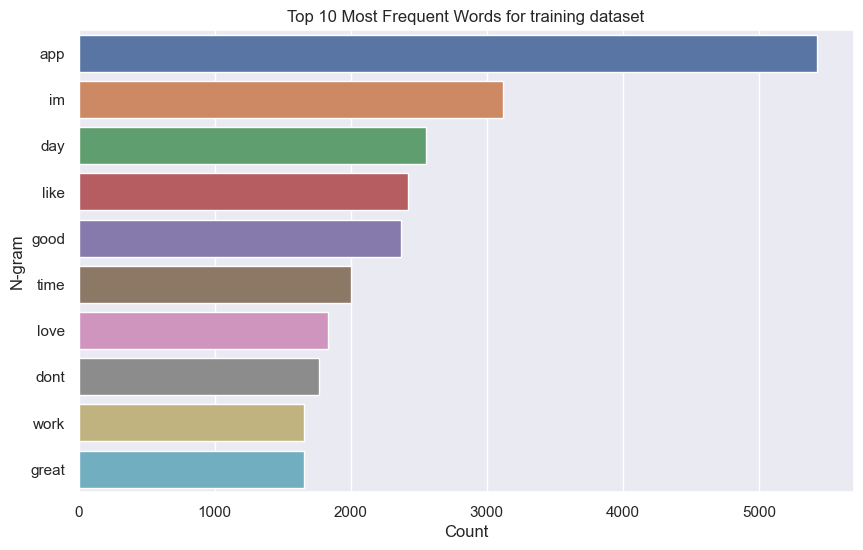

In [33]:
plt.figure(figsize=(10,6))
sns.barplot(data=word_count_train, x='count', y='ngram', hue='ngram', legend=False)
plt.title(f'Top {top_n} Most Frequent Words for training dataset')
plt.xlabel('Count')
plt.ylabel('N-gram')
plt.show()

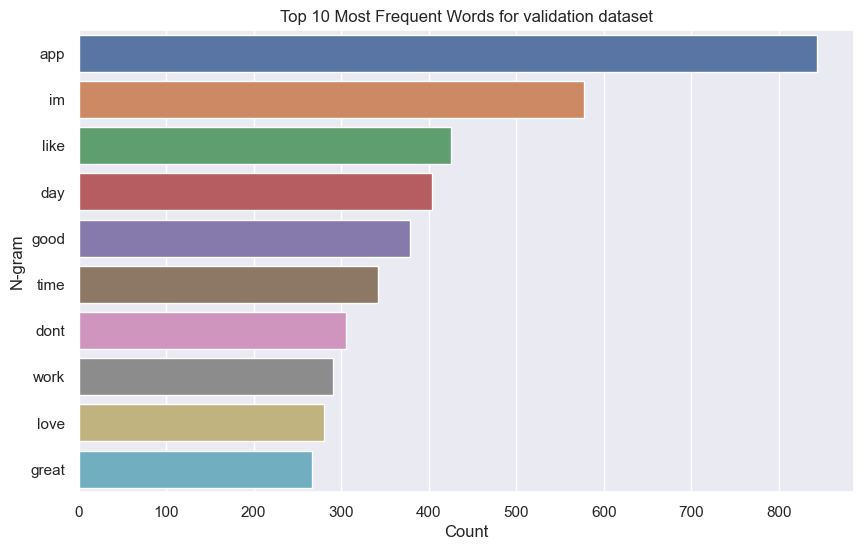

In [34]:
plt.figure(figsize=(10,6))
sns.barplot(data=word_count_test, x='count', y='ngram', hue='ngram', legend=False)
plt.title(f'Top {top_n} Most Frequent Words for validation dataset')
plt.xlabel('Count')
plt.ylabel('N-gram')
plt.show()

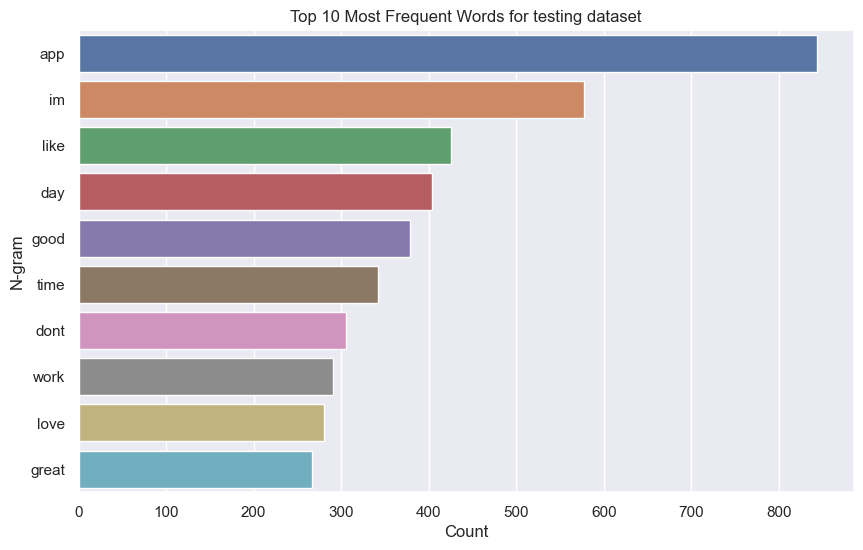

In [35]:
plt.figure(figsize=(10,6))
sns.barplot(data=word_count_test, x='count', y='ngram', hue='ngram', legend=False)
plt.title(f'Top {top_n} Most Frequent Words for testing dataset')
plt.xlabel('Count')
plt.ylabel('N-gram')
plt.show()

From the visualisation of the Uni-gram frequency for each dataset, we can see that the top 10 unigrams are consistent across each dataset.

In [36]:
from torch.utils.data import DataLoader, Dataset
from transformers import AutoTokenizer

In [37]:
tokeniser = AutoTokenizer.from_pretrained("distilbert-base-uncased")

In [38]:
class SentimentDataSet(Dataset):
    def __init__(self, df, tokenizer, max_len=128):
        self.texts = df['text']
        self.labels = df['label']
        self.tokenizer = tokenizer
        self.max_len = max_len
    
    def __len__(self):
        return len(self.labels)
    
    def __getitem__(self, idx):
        encodings = self.tokenizer(
            self.texts[idx],
            padding='max_length',
            truncation=True,
            max_length=self.max_len,
            return_tensors='pt'
        )

        return {
            'input_ids': encodings['input_ids'].squeeze(0),
            'attention_mask': encodings['attention_mask'].squeeze(0),
            'label': torch.tensor(self.labels[idx], dtype=torch.long)
        }

In [39]:
train_ds[['text','label']].head()

,text,label
0,cooking microwave pizzas yummy,1
1,plans allowing sub tasks widget,0
2,love humor reworded like saying group therapy ...,1
3,naw idk ur talkin,0
4,sucks hear hate days like,-1


In [40]:
test = SentimentDataSet(train_ds[['text','label']], tokeniser)
train_dataloader = DataLoader(test, batch_size=8, shuffle=True)